<a href="https://colab.research.google.com/github/akshat2635/DL/blob/main/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:55<00:00, 23.7MB/s]
100% 1.06G/1.06G [00:55<00:00, 20.7MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,BatchNormalization,Dropout

In [5]:
train_ds=keras.utils.image_dataset_from_directory(directory='/content/train',labels='inferred',label_mode='int',batch_size=32,
                                         image_size=(256,256))
test_ds=keras.utils.image_dataset_from_directory(directory='/content/test',labels='inferred',label_mode='int',batch_size=32,
                                         image_size=(256,256))


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(img,lab):
  img=tf.cast(img/255,tf.float32)
  return img,lab
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [21]:
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

# model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 254, 254, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 125, 125, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 125, 125, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │       8,128,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,151,713 (31.10 MB)

 Trainable params: 8,151,329 (31.09 MB)

 Non-trainable params: 384 (1.50 KB)

In [23]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 95ms/step - accuracy: 0.6092 - loss: 0.6971 - val_accuracy: 0.6158 - val_loss: 0.6326
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.7130 - loss: 0.5590 - val_accuracy: 0.6660 - val_loss: 0.7585
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.7740 - loss: 0.4751 - val_accuracy: 0.7694 - val_loss: 0.4844
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.8363 - loss: 0.3685 - val_accuracy: 0.7692 - val_loss: 0.5785
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 92ms/step - accuracy: 0.8905 - loss: 0.2610 - val_accuracy: 0.7494 - val_loss: 0.6891
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 87ms/step - accuracy: 0.9317 - loss: 0.1726 - val_accuracy: 0.7856 - val_loss: 0.6265
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.9494 - loss: 0.1325 - val_accuracy: 0.7612 - val_loss: 0.8996
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.9636 - loss: 0.0986 - 

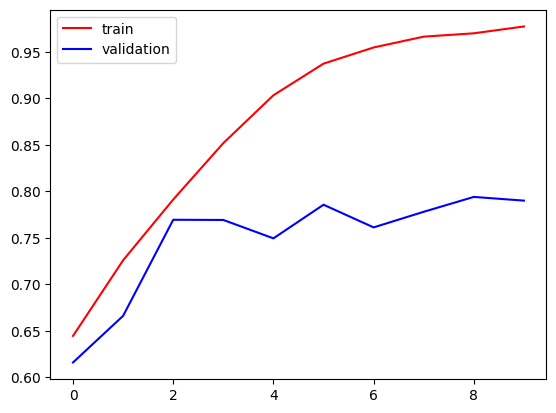

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy' ], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt. legend()
plt.show()

In [ ]:
import cv2
import os
import numpy as np

data=[]
cats=[]
label=[]
i=0
for root,subdirs,files in os.walk('/content/dogs_vs_cats/test'):
    if(root=='/content/dogs_vs_cats/test'):
        cats=subdirs
    else:
        a=[]
        for file in files:
            # print(root+file)
            data.append(cv2.resize(cv2.imread(root+'/'+file),(256,256)))
            label.append(cats[i])
        i+=1
np.unique(label,return_counts=True)
data=np.array(data)
X_test=data
y_test=np.array(label)
X_test=X_test/255
# cats=['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
from sklearn.metrics import accuracy_score
p=model.predict(X_test)
y_pred=[]
for p1 in p:
    y_pred.append(cats[p1.argmax()])
y_pred
import random
print("accuracy : ",accuracy_score(y_pred,y_test))
plt.figure(figsize=(10, 5))
for j in range(0,10):
    plt.subplot(2, 5, j + 1)
    plt.xticks(())
    plt.yticks(())
    i=random.randint(0,len(X_test)-1)
    plt.title(f"true: {y_test[i]}")
    # print()
    plt.imshow(X_test[i],cmap='gray')
    plt.xlabel(f"predicted: {y_pred[i]}")
plt.tight_layout()
plt.show()